<!DOCTYPE html>
<html>

<head>
    <title>Teleportation</title>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ul {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <div class="center">
        <img src="Logo_for_all/logo_round.png" alt="QHSO Logo" width="100">
    </div>
    <h1 style="text-align: center;">Quantum Teleportation: Sending Quantum Secrets</h1>
    <p>Welcome to the fascinating world of quantum teleportation! In this notebook, we're going to embark on an incredible journey where we'll learn how to teleport quantum information from one place to another using the magic of quantum entanglement. Get ready for an adventure like no other! And we will also run our circuit to a real IBM Quantum Computer</p>
    <h2>What is Quantum Teleportation?</h2>
    <p>Imagine being able to send a quantum state (a qubit) to your friend, instantly! That's what quantum teleportation allows us to do. It's like teleporting in your favorite sci-fi movies, but with quantum information. <br>Here's the catch: we can't just copy and paste quantum states like regular information. Instead, we use a combination of three qubits and some quantum trickery to send the information securely.</p>
    <h2>Let's build a teleportation circuit!</h2>
    <p>Let's create a teleportation circuit. We will expalin every steps in details  and finally we will run it in a real-life quantum computer. For this we have to create a quantum circuit with three qubits and three classic bits. The reason we need three qubits is that, one to represent the state and two that we will entangle and share with O'Neal and Jaya:</p>
</body>

</html>

1) We import the necessary libraries and create a quantum circuit with three qubits and three classical bits.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_state_qsphere, plot_histogram

# We create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'qubit')

# We create a Classical Register with 3 bits.
c = ClassicalRegister(3, 'Classical bit')

# We create a Quantum Circuit
qc = QuantumCircuit(q, c)


The first qubit is the message qubit that O'Neal wants to send to Jaya. The second and third qubits are the entangled pair of qubits that O'Neal sends to Jaya. The classical bits are used to communicate two classical bits of information from O'Neal to Jaya.

2) Let's create the message that O'Neal wants to send to Jaya. It is unknown to both O'Neal and Jaya. Only we will know because we are the creators of this message. We will create a random state using the following code:

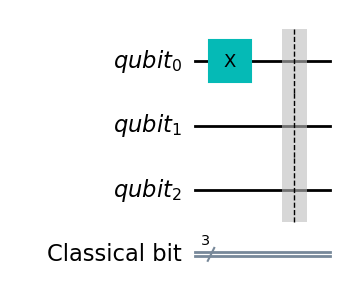

In [2]:
# We add x gate to the first qubit
qc.x(q[0])
qc.barrier()
qc.draw(output='mpl')

3) We will now create an entangled pair of qubits that O'Neal will send to Jaya. We will use the following code to create the entangled pair:

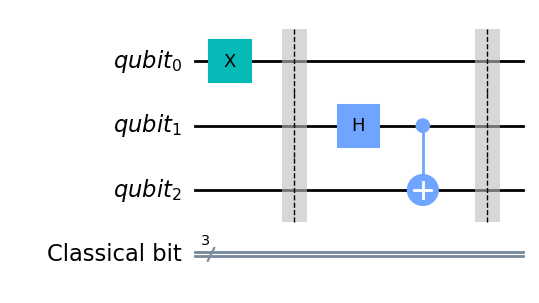

In [3]:
qc.h(q[1])
qc.cx(q[1], q[2])
qc.barrier()
qc.draw(output='mpl')

O'Neal will keep one qubit[1] and send other qubit[2] to Jaya. To entangle the two qubits, we apply a h gate to O'Neal's qubit, qubit[1]. After that we apply cx gate, where the control is connected to O'Neal's qubit and the target is connected to jaya's qubit.

4) Now, we will entangle the O'Neal's qubit with the qubit that has the encrypted messages (state). Then we add h gate prior to measuring both message contained qubit and O'Neal's entangled qubit.  

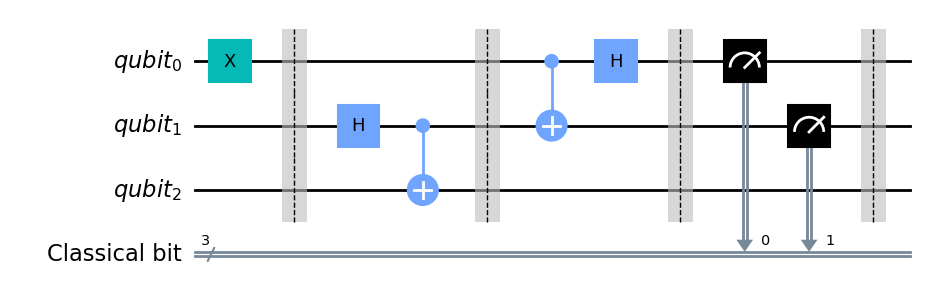

In [4]:
qc.cx(q[0], q[1])
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw(output='mpl')

5) Now, O'Neal calls Jaya telling him that he has sent two qubits to him. One of them is the message qubit and the other is the entangled qubit. O'Neal also tells Jaya the two classical bits that he got from measuring the two qubits. Jaya then applies the following gates depending on the values of the classical bits:

In [5]:
from math import pi
qc.crx(pi, q[1], q[2]).c_if(c, 1)
qc.crz(pi, q[0], q[2]).c_if(c, 1)

6) Let's draw the circuit to see what it looks like:

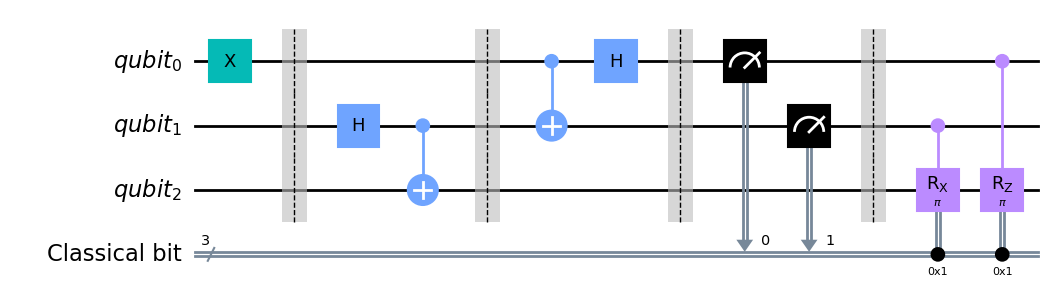

In [6]:
qc.draw(output='mpl')

Here Jaya applies controled rotation x gate, where the control is connected to the entangled qubit and the target is connected to the Jaya's qubit. If the classical bit 1 is 1, then it rotates the qubit by 180 degrees. He also applies controled rotation z gate, where the control is connected to the message qubit and the target is connected to the Jaya's qubit. If the classical bit 2 is 1, then it rotates the qubit by 180 degrees. Because of the rotation, the state of the qubit is now the same as the original state that O'Neal wanted to send to Jaya.

7) Let's see the result of the circuit:

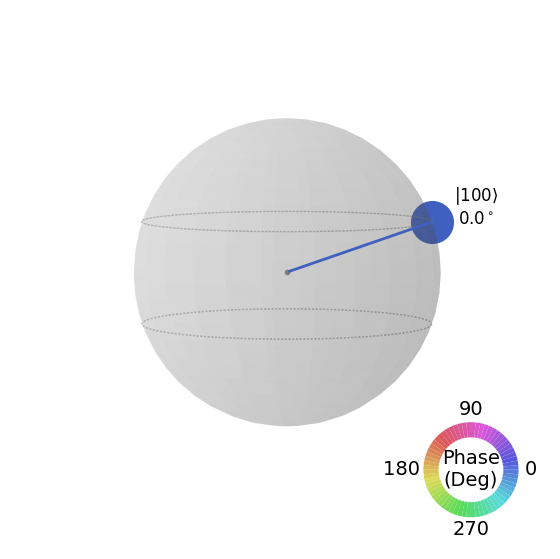

In [39]:
# We execute the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector, show_state_phases = True, use_degrees = True)

Here we can see that the state of the qubit is the same as the original state that O'Neal wanted to send to Jaya.

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ol {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <h2>Let's run this circuit on a real life quantum computer</h2>
</body>

</html>

1) First, we need to import the necessary libraries and use the IBMQ account to run the circuit on a real quantum computer.

In [40]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Replace 'MY_API_TOKEN' with your actual API token
IBMQ.save_account('API_TOKEN', overwrite=True)


![Logo_for_all/logo_round.png](IBM_TOKEN_IMG/IBM.png)

2) Let's get a list of all the available backends on IBMQ and choose the least busy one.

In [41]:
# We get the least busy IBM Quantum device
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and not x.configuration().simulator and x.status().operational==True))

# We print the name of the least busy backend
print("Least busy backend:", backend.name())

Least busy backend: ibmq_belem


3) We will now run the circuit on the least busy backend. We will use the following code to run the circuit:

In [ ]:
import time
from qiskit.tools.monitor import job_monitor

# We execute the circuit on the least busy backend. Monitor the execution of the job in the queue
backend = provider.get_backend('ibmq_belem')

# We execute the circuit on the backend
start_time = time.time()
job_exp = execute(qc, backend=backend, shots=1024)
job_monitor(job_exp, interval=2)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
end_time = time.time()

4) Let's see the results and the time it took to run the code:

In [ ]:
# We calculate the time taken in minutes and seconds
time_taken = end_time - start_time
minutes, seconds = divmod(time_taken, 60)

# We print the results and the time it took to run the code
print("Counts:", counts_exp)
print("Time taken: {} minutes and {:.2f} seconds".format(int(minutes), seconds))

5) Let's see the results in a histogram:

In [ ]:
plot_histogram(counts_exp)

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ol {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <h2>Applications of Quantum Teleportation</h2>
    <p>Quantum teleportation isn't just a fascinating concept; it has practical applications:</p>
    <ol>
        <li><strong>Secure Communication:</strong> It ensures that quantum information is sent securely without being intercepted.</li>
        <li><strong>Quantum Internet:</strong> Quantum teleportation is a building block for future quantum internet technologies.</li>
        <li><strong>Quantum Cryptography:</strong> It can be used in quantum encryption, making communications ultra-secure.</li>
    </ol>
</body>

</html>

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ol {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
        /* Define the button styles */
        .button {
            background-color: #4CAF50; /* Green */
            border: none;
            color: white;
            padding: 15px 32px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px auto; /* Center the button horizontally */
            cursor: pointer;
            transition-duration: 0.4s;
            border-radius: 10px; /* Add rounded corners */
            box-shadow: 0 5px #666; /* Add a shadow */
        }
        /* Define the hover effect */
        .button:hover {
            background-color: #008CBA; /* Blue */
            color: white;
        }
        /* Define the active effect */
        .button:active {
            background-color: #3e8e41; /* Dark green */
            box-shadow: 0 2px #666; /* Change the shadow */
            transform: translateY(4px);
        }
    </style>
</head>

<body>
    <h2>What's next?</h2>
    <p>Up until now, we've explored the incredible world of quantum teleportation, where we've witnessed the transfer of quantum information across space using the magic of entanglement and quantum measurements. This concept has far-reaching implications in secure communication and quantum networking.<br> Now, it's time to shift our focus from quantum communication to quantum computation. We're about to dive into an algorithm that showcases the true power of quantum computers—the Bernstein-Vazirani (BV) algorithm.<br> While quantum teleportation deals with transmitting quantum states, the BV algorithm revolves around solving a specific type of problem faster than classical computers can. It's an algorithmic wonder that illustrates how quantum computers can outperform classical ones in certain tasks.<br> In the next notebook, we'll unravel the BV algorithm step by step, exploring its inner workings and the magic it brings to quantum computing. Get ready for another thrilling quantum adventure!</p>
    <div class="center"> <!-- Center the button vertically -->
        <!-- Create the button element -->
        <a href = "BV.ipynb"><button class="button">Bernstein-Vazirani algorithm</button></a>
    </div>
</body>

</html>

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        .created-by {
         font-family: 'Jost', sans-serif;
         text-align: center;
         margin-top: 50px;
        }
        .created-by a {
            color: #fff;
            text-decoration: none;
        }
        .created-by a:hover {
            color: #8BC34A;
        }
    </style>
</head>

<body>
    <div class="created-by">
        Created by <a href="https://www.linkedin.com/in/abdullah-al-omar-galib-30b6b1258">Abdullah Al Omar Galib (Ahkatlio)</a>
    </div>
</body>

</html>